<a href="https://colab.research.google.com/github/heybhai/denominator/blob/master/PyTorch_Shark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available)

1.10.0+cu111
<function is_available at 0x7f28e2f77290>


In [28]:
import urllib.request
#url = url = 'https://pytorch.tips/coffee'
url = url = 'https://www.thoughtco.com/thmb/vuXVX1M889A7IImYVwAD1ZVns3E=/2892x1627/smart/filters:no_upscale()/hammerhead-shark-151080961-5b202eba8023b900362a44ff.jpg'
#fpath = 'coffee.jpg'
fpath ='hshark.jpg'
urllib.request.urlretrieve(url, fpath)


('hshark.jpg', <http.client.HTTPMessage at 0x7f28d1b7c1d0>)

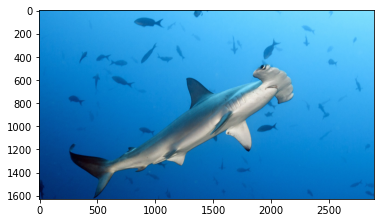

In [29]:
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open('hshark.jpg')
plt.imshow(img)

In [30]:
import torch
from torchvision import transforms
transform = transforms.Compose([
 transforms.Resize(256),
 transforms.CenterCrop(224),
 transforms.ToTensor(),
 transforms.Normalize(
 mean=[0.485, 0.456, 0.406],
 std=[0.229, 0.224, 0.225])])
img_tensor = transform(img)
print(type(img_tensor), img_tensor.shape)

<class 'torch.Tensor'> torch.Size([3, 224, 224])


In [31]:
batch = img_tensor.unsqueeze(0)
print(batch.shape)

torch.Size([1, 3, 224, 224])


In [14]:
from torchvision import models
model = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [32]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
# out(results will vary): cpu
model.eval()
model.to(device)
y = model(batch.to(device))
print(y.shape)
# out: torch.Size([1, 1000])

cuda
torch.Size([1, 1000])


In [33]:
y_max, index = torch.max(y,1)
print(index, y_max)


tensor([4], device='cuda:0') tensor([22.5006], device='cuda:0', grad_fn=<MaxBackward0>)


In [34]:
url = 'https://pytorch.tips/imagenet-labels'
fpath = 'imagenet_class_labels.txt'
urllib.request.urlretrieve(url, fpath)
with open('imagenet_class_labels.txt') as f:
 classes = [line.strip() for line in f.readlines()]
print(classes[4])

4: 'hammerhead, hammerhead shark',


In [35]:
prob = torch.nn.functional.softmax(y, dim=1)[0] * 100
print(classes[index[0]], prob[index[0]].item())


4: 'hammerhead, hammerhead shark', 91.7284164428711


In [36]:
_, indices = torch.sort(y, descending=True)
for idx in indices[0][:5]:
 print(classes[idx], prob[idx].item())


4: 'hammerhead, hammerhead shark', 91.7284164428711
3: 'tiger shark, Galeocerdo cuvieri', 8.112930297851562
2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 0.12526413798332214
5: 'electric ray, crampfish, numbfish, torpedo', 0.006863401271402836
148: 'killer whale, killer, orca, grampus, sea wolf, Orcinus orca', 0.00526583194732666
